In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

##### Ex 1: Quadratic dependence
Given:
- Random variable transformation $x$ → $y = x^2$
- $x \sim \mathcal{N}(2, 1)$

1. generate $\sim 10^6$ samples and compare numerically
2. compare $y$ histogram with analytic formula
3. try different $x$ distribution e.g. Poisson with $\mu = 3$

Correct analytical formula for $Y \equiv X^2$ PDF:
- CDF, by definition $F_Y(y) = P(Y < y) = P(X^2 < y) = P(- \sqrt{y} < X < \sqrt{y}) = F_{X}(\sqrt{y}) - F_X(- \sqrt{y})$
- Differentiating to get PDF $\displaystyle f_Y(Y) = \frac{d F_Y(y)}{d y} =  \frac{1}{2\sqrt{y}}f_{X}(\sqrt{y}) + \frac{1}{2\sqrt{y}} f_X(- \sqrt{y})$

Incorrect analytical formula (assumes monotonous transformation which is not true in this case):
$f_Y(y) = f_X(\sqrt{y}) |\frac{1}{2 \sqrt{y}}|$

It **becomes** correct if we limit $x$ range to $[0, \infty)$, thus making the transformation monotonous.

In [36]:
def ex1(x_rv: scipy.stats.rv_continuous):
    sample_size = 1_000_000

    x_sample = x_rv.rvs(size=(sample_size))
    y_sample = x_sample**2

    _, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

    ax1.hist(x_sample, bins=100, density=True)
    ax1.set_xlabel("$x$")
    ax1.set_yticks([])

    ax2.hist(y_sample, bins=100, density=True)
    hist_ylim = ax2.get_ylim()
    y_range = np.linspace(0, 30, num=500) + 1e-3
    sqrt_y = np.sqrt(y_range)
    ax2.plot(y_range, ((x_rv.pdf(sqrt_y) + x_rv.pdf(- sqrt_y)) / (2 * sqrt_y)), label="Correct PDF")
    ax2.plot(y_range, (x_rv.pdf(sqrt_y) / (2 * sqrt_y)), label="Incorrect PDF")
    ax2.set_xlabel("$y \equiv x^2$")
    ax2.set_yticks([])
    ax2.set_ylim(hist_ylim)  # not counting PDF peak at 0
    ax2.legend()

    plt.tight_layout()
    plt.show()

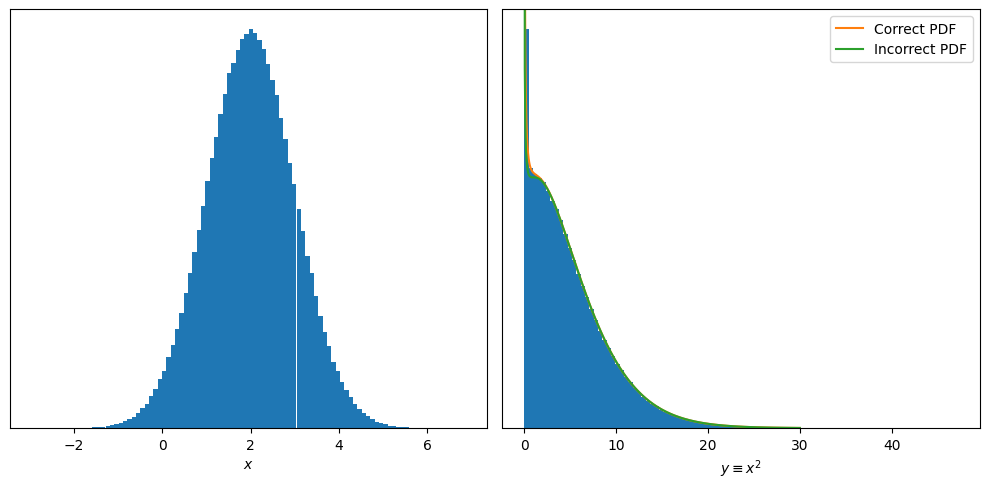

In [37]:
ex1(x_rv=scipy.stats.norm(loc=2, scale=1))

AttributeError: 'rv_discrete_frozen' object has no attribute 'pdf'

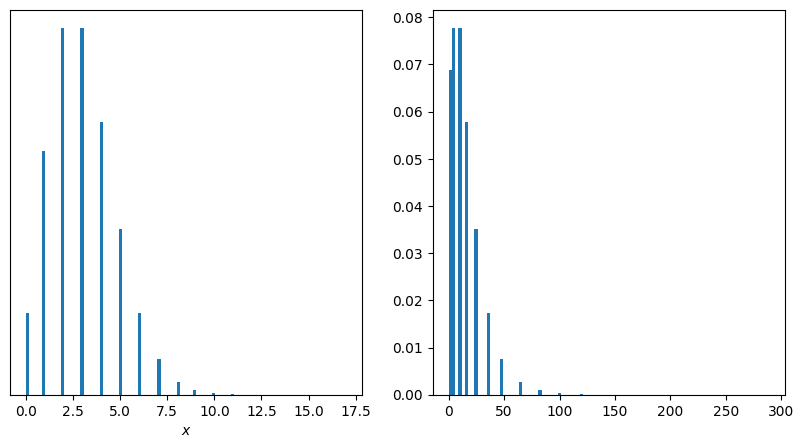

In [35]:
ex1(x_rv=scipy.stats.poisson(mu=3))